In [2]:
import pandas as pd
import numpy as np

In [3]:
# create a small dictionary with different data types

dft = pd.DataFrame(dict(A = np.random.rand(3),
                        B = 1,
                        C = 'foo',
                        D = pd.Timestamp('20010102'),
                        E = pd.Series([1.0]*3).astype('float32'),
                                F = False,
                                G = pd.Series([1]*3,dtype='int8')))

dft

,A,B,C,D,E,F,G
0,0.676908,1,foo,2001-01-02,1.0,False,1
1,0.033505,1,foo,2001-01-02,1.0,False,1
2,0.289845,1,foo,2001-01-02,1.0,False,1


In [18]:
dft['H'] = dft['E']
dft
dft.eval('I=H*100')
dft
dft1 = dft.copy()
dft1.eval('J=A*2')
dft1
del dft1['I']
dft1.drop("C", axis = 1)
dft1.pop('A')
dft1

/Users/davidswan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  app.launch_new_instance()
/Users/davidswan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


,B,C,D,E,F,G,H,J
0,1,foo,2001-01-02,1.0,False,1,1.0,1.353817
1,1,foo,2001-01-02,1.0,False,1,1.0,0.067009
2,1,foo,2001-01-02,1.0,False,1,1.0,0.579690


In [19]:
# There is a really easy way to see what kind of dtypes 
# are in each column. 

dft1.dtypes

B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
H           float32
J           float64
dtype: object

In [10]:
# If a pandas object contains data multiple dtypes IN A 
# SINGLE COLUMN, the dtype of the column will be chosen 
# to accommodate all of the data types (object is the 
# most general).
# these ints are coerced to floats

pd.Series([1, 2, 3, 4, 5, 6.])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: float64

In [11]:
# string data forces an ``object`` dtype

pd.Series([1, 2, 3, 6., 'foo'])

0      1
1      2
2      3
3      6
4    foo
dtype: object

In [12]:
# The method get_dtype_counts() will return the number 
# of columns of each type in a DataFrame:

dft.get_dtype_counts()

bool              1
datetime64[ns]    1
float32           1
float64           1
int64             1
int8              1
object            1
dtype: int64

In [20]:
# create a small data frame. 

df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.621805,-1.628346,0.694864,-0.176171
1,0.538292,0.210980,-0.477822,-0.322081
2,-2.718247,0.737424,-1.100539,-0.451744
3,1.317570,-0.186368,0.311440,-0.555521
4,-1.523270,-0.455632,1.315156,-1.365773
5,0.734273,0.122446,0.033909,-0.269912
6,-0.972065,0.218930,0.923712,-0.060833
7,-0.013093,0.312841,0.653597,-1.274316
8,0.924975,1.288539,1.334238,-0.447968
9,-1.290277,1.571752,-0.297260,1.319049


In [22]:
df[['a']]

,a
0,-1.621805
1,0.538292
2,-2.718247
3,1.317570
4,-1.523270
5,0.734273
6,-0.972065
7,-0.013093
8,0.924975
9,-1.290277


In [21]:
# Use df.apply to find the square root of all the values. 
# NaN means not a number

df.apply(np.sqrt)

,a,b,c,d
0,NaN,NaN,0.833585,NaN
1,0.733684,0.459326,NaN,NaN
2,NaN,0.858734,NaN,NaN
3,1.147855,NaN,0.558068,NaN
4,NaN,NaN,1.146803,NaN
5,0.856897,0.349923,0.184143,NaN
6,NaN,0.467900,0.961099,NaN
7,NaN,0.559321,0.808453,NaN
8,0.961756,1.135138,1.155092,NaN
9,NaN,1.253695,NaN,1.148499


In [25]:
# find the mean of all of the columns

df.apply(np.std, axis=1)

0    0.991264
1    0.407946
2    1.247719
3    0.703487
4    1.128405
5    0.364634
6    0.679480
7    0.728587
8    0.723639
9    1.176738
dtype: float64

In [52]:
# find the mean of all of the rows

df.apply(np.mean, axis=1)

0   -0.107741
1    0.150478
2    0.006714
3    0.467566
4   -0.253156
dtype: float64

In [28]:
# Let's create a random array with 50 numbers, ranging 
# from 0 to 7.

data = np.random.randint(0, 7, size = 50)
data

array([0, 4, 6, 0, 0, 3, 2, 1, 5, 3, 2, 1, 2, 2, 6, 4, 2, 1, 3, 4, 1, 1, 6,
       6, 1, 0, 2, 4, 2, 4, 5, 6, 3, 6, 1, 6, 4, 4, 0, 3, 1, 5, 2, 5, 5, 6,
       0, 3, 2, 0])

In [29]:
# convert the array into a series

s = pd.Series(data)

In [36]:
# How many of each number is there in the series? Enter 
# value_counts()

pd.value_counts(s)

2    9
6    8
1    8
4    7
0    7
3    6
5    5
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a6707d0>]], dtype=object)

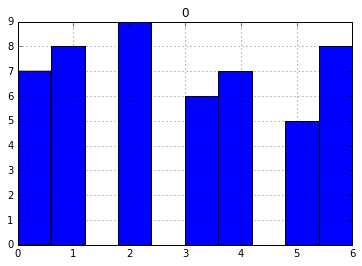

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(s).hist()

In [43]:
data = pd.read_csv("/Users/davidswan/Desktop/GA WORK/curriculum/week-01/5.2-lab/assets/datasets/sales_info.csv")
data.apply(np.mean,axis=0)

volume_sold          10.018684
2015_margin          46.858895
2015_q1_sales    154631.668200
2016_q1_sales    154699.178750
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf1be50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1ec350>]], dtype=object)

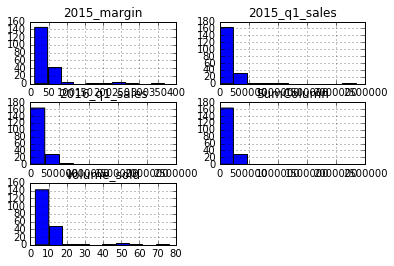

In [63]:
datacopy = data.copy()
datacopy['SumColumn'] = datacopy['2015_margin'] + datacopy['2015_q1_sales']
datacopy.hist()